# Descriptive Statistics Review

In this second part of the lab, we are going to continue working with the data that we cleaned in the last part. 
Be sure to continue to write clean code and comment your work well!

First, lets import our libraries and the data we saved. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def calculate_z (depth,x,y): 
    if x == 0 and y == 0 :
        z = np.nan
        return z 
    else :
        z = round(depth*(x + y)/200, 2)
        return z

In [3]:
diamonds = pd.read_csv('diamonds.csv')
diamonds['z'] = diamonds[['depth','x','y']].apply(lambda z: calculate_z(z['depth'],z['x'],z['y']), axis=1)
diamonds = diamonds.dropna(how='any')
diamonds = diamonds[(diamonds['y']<=11) & (diamonds['y']>=3)]
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


Now that we cleaned our data, we can proceed with some exploratory analysis. We will analyze the features that affect price the most.

Let's start by looking at how the charateristics of a diamond (especially the price, since that's our focus) change based on its color. Remember that you can use the `groupby()` method in pandas. 

**Using the `describe()` method, take a look on the dataset paying special attention to the variability. Comment what you see.**

In [7]:
#your code here
diamonds.groupby('color').describe().T

color                   D             E             F             G  \
carat count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean       0.656904      0.658959      0.736263      0.770016   
      std        0.358844      0.369860      0.396703      0.440963   
      min        0.200000      0.200000      0.220000      0.230000   
      25%        0.360000      0.360000      0.400000      0.390000   
      50%        0.530000      0.530000      0.700000      0.700000   
      75%        0.900000      0.900000      1.010000      1.040000   
      max        3.400000      3.050000      2.670000      3.010000   
depth count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean      61.707891     61.660769     61.701595     61.757540   
      std        1.407341      1.448169      1.441127      1.363629   
      min       52.200000     51.000000     52.300000     43.000000   
      25%       61.000000     60.900000     61.000000     61.100000   
      50%       61.800000     61.800000     61.800000     61.800000   
      75%       62.500000     62.500000     62.500000     62.500000   
      max       71.600000     79.000000     71.000000     72.900000   
table count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean      57.384868     57.490866     57.420261     57.290170   
      std        2.198958      2.257434      2.259439      2.145337   
      min       52.000000     44.000000     50.000000     52.000000   
      25%       56.000000     56.000000     56.000000     56.000000   
      50%       57.000000     57.000000     57.000000     57.000000   
      75%       59.000000     59.000000     59.000000     59.000000   
      max       73.000000     73.000000     95.000000     76.000000   
price count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean    3162.202468   3091.497632   3722.306865   3989.929995   
      std     3342.211976   3358.375556   3780.935363   4039.176023   
      min      357.000000    326.000000    342.000000    354.000000   
      25%      911.000000    887.750000    982.000000    931.000000   
      50%     1828.000000   1746.000000   2340.500000   2215.000000   
      75%     4205.000000   4027.750000   4852.250000   6048.000000   
      max    18693.000000  18731.000000  18791.000000  18818.000000   
x     count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean       5.415491      5.413970      5.615883      5.676257   
      std        0.935711      0.963688      1.003768      1.079622   
      min        3.730000      3.740000      0.000000      3.880000   
      25%        4.590000      4.570000      4.730000      4.690000   
      50%        5.230000      5.240000      5.640000      5.630000   
      75%        6.170000      6.180000      6.410000      6.530000   
      max        9.420000      9.260000      8.780000      9.440000   
y     count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean       5.419706      5.418525      5.620435      5.678986   
      std        0.931819      0.958900      0.994318      1.071671   
      min        3.680000      3.710000      3.840000      3.900000   
      25%        4.600000      4.570000      4.740000      4.700000   
      50%        5.240000      5.240000      5.640000      5.610000   
      75%        6.180000      6.190000      6.410000      6.520000   
      max        9.340000      9.250000      8.700000      9.370000   
z     count   6159.000000   8868.000000   8652.000000  10285.000000   
      mean       3.342239      3.339129      3.466404      3.506151   
      std        0.575789      0.594307      0.620182      0.667287   
      min        2.290000      2.240000      2.040000      2.340000   
      25%        2.820000      2.810000      2.920000      2.880000   
      50%        3.220000      3.220000      3.480000      3.470000   
      75%        3.830000      3.830000      3.980000      4.030000   
      max        6.27000

In [ ]:
#your comments here


Let's proceed to check each feature separately. 

**Before starting, which features do you think that will affect the price most and why? You will contrast your hypotheses with your results.**

In [ ]:
#your hypotheses here
Carat
cut 
Color
Clarity
Depth
Cut

## 1. The `color` column
First, let's look at the color column.

**For each different color, find the mean of each column. You should have a matrix with every color as rows and the columns `carat`, `clarity`, etc as columns.**

In [9]:
#your code here
diamonds.groupby('color').mean()

,carat,depth,table,price,x,y,z
color,,,,,,,
D,0.656904,61.707891,57.384868,3162.202468,5.415491,5.419706,3.342239
E,0.658959,61.660769,57.490866,3091.497632,5.413970,5.418525,3.339129
F,0.736263,61.701595,57.420261,3722.306865,5.615883,5.620435,3.466404
G,0.770016,61.757540,57.290170,3989.929995,5.676257,5.678986,3.506151
H,0.909553,61.833904,57.518809,4474.408808,5.979861,5.975433,3.695464
I,1.030982,61.853078,57.570239,5121.677848,6.230671,6.230626,3.852197
J,1.164531,61.888268,57.798701,5342.467323,6.523567,6.523402,4.035657


**What do you see? Pay special attention to the relationship between price and color.**

In [ ]:
#your thoughts here


Let's go further into the color feature. We will plot the frequency distribution of the diamonds color in our dataset. 

**Plot the distribution and analyze it. Remember that you can use the pandas `plot()` method.**

<AxesSubplot:xlabel='color', ylabel='Count'>

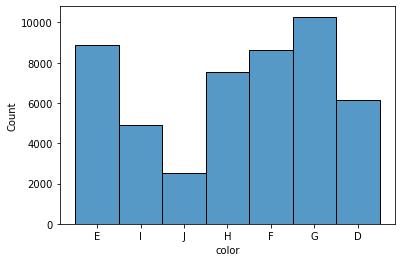

In [28]:
#your code here
sns.histplot(data =diamonds, x='color')

In [ ]:
#your comments here

## 2.The `carat` column 

Let's check the `carat` (weight), since this could also be a potential factor for price change.

**Find the mean of each column for each value of `carat` using the `groupby` method. Then comment your results.**

In [29]:
#your code here
diamonds.groupby('carat').mean()

,depth,table,price,x,y,z
carat,,,,,,
0.20,60.866667,59.333333,364.555556,3.792222,3.758889,2.297778
0.21,60.511111,58.444444,380.222222,3.874444,3.837778,2.332222
0.22,60.750000,60.250000,405.000000,3.905000,3.865000,2.360000
0.23,61.402612,58.026119,486.776119,3.946903,3.974403,2.431194
0.24,61.600000,57.563559,502.860169,3.989661,4.018263,2.465890
...,...,...,...,...,...,...
3.67,62.400000,56.000000,16193.000000,9.860000,9.810000,6.140000
4.00,63.300000,58.000000,15984.000000,10.010000,9.940000,6.310000
4.01,61.750000,61.500000,15223.000000,10.080000,10.020000,6.205000


In [ ]:
#your comments


**Plot a histogram of the `carat` column by using the `plot` method (see the docs to find an easy way to do so). What is happening?**

<AxesSubplot:xlabel='carat', ylabel='Count'>

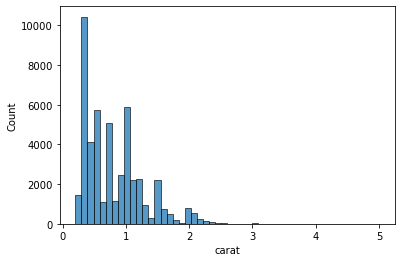

In [34]:
#your code here
sns.histplot(data =diamonds, x='carat',bins=50)

# 3. The `table` and `clarity` column
Finally, let's check the `table`.

**Find the mean of each column for each value of `table` using the `groupby` method. Then comment your results.**

In [35]:
#your code here
diamonds.groupby('table').mean()

,carat,depth,price,x,y,z
table,,,,,,
43.0,1.0400,62.90,4997.0,6.450,6.410,4.040
44.0,0.2900,62.80,474.0,4.200,4.240,2.650
49.0,0.6500,64.25,2290.5,5.355,5.320,3.425
50.0,1.0200,61.80,4227.0,6.590,6.510,4.050
50.1,0.9400,66.00,3353.0,6.130,6.170,4.060
...,...,...,...,...,...,...
71.0,0.6800,58.00,1633.0,5.850,5.700,3.350
73.0,0.6025,68.90,2406.5,5.520,5.465,3.750
76.0,0.7900,65.30,2362.0,5.520,5.130,3.480


<AxesSubplot:xlabel='table', ylabel='Count'>

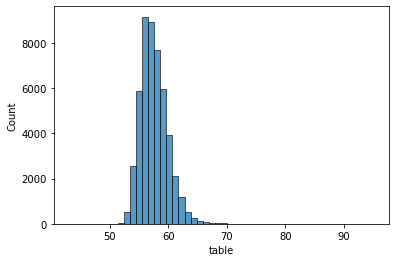

In [36]:
#your comments here
sns.histplot(data =diamonds, x='table',bins=50)

**Finally, do the same with the `clarity` column.**

In [37]:
#your code here
diamonds.groupby('clarity').mean()

,carat,depth,table,price,x,y,z
clarity,,,,,,,
I1,1.282644,62.761702,58.297720,3931.088146,6.758328,6.706337,4.223480
IF,0.507247,61.501674,56.488159,2874.269684,4.974743,4.996696,3.065741
SI1,0.851919,61.855544,57.657598,4006.569726,5.892237,5.891973,3.643453
SI2,1.079291,61.773302,57.922555,5078.757225,6.405619,6.396416,3.952941
VS1,0.725369,61.668659,57.305076,3823.228548,5.569690,5.576710,3.436290
VS2,0.764359,61.729003,57.413755,3926.107165,5.659131,5.660504,3.493179
VVS1,0.502684,61.634548,56.872711,2518.059036,4.960771,4.975431,3.061750
VVS2,0.594947,61.666063,57.032449,3273.212082,5.215448,5.228803,3.219862


<AxesSubplot:xlabel='clarity', ylabel='Count'>

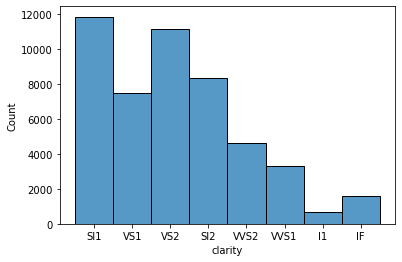

In [38]:
#your comments here
sns.histplot(data =diamonds, x='clarity')

**After looking at your results, which features do you think will affect price the most now? Regarding your hypotheses, do they match your final results? Provide a small overview.**

In [ ]:
#your thoughts here

# Bonus: taking a deeper look with plots and correlations

To take deeper look, we will use the `pairplot` method of `seaborn` library. This method plots a scatterplot for each pair of features and in the diagonal the distribution of the feature.

So if you have many features it will take a while, be careful!


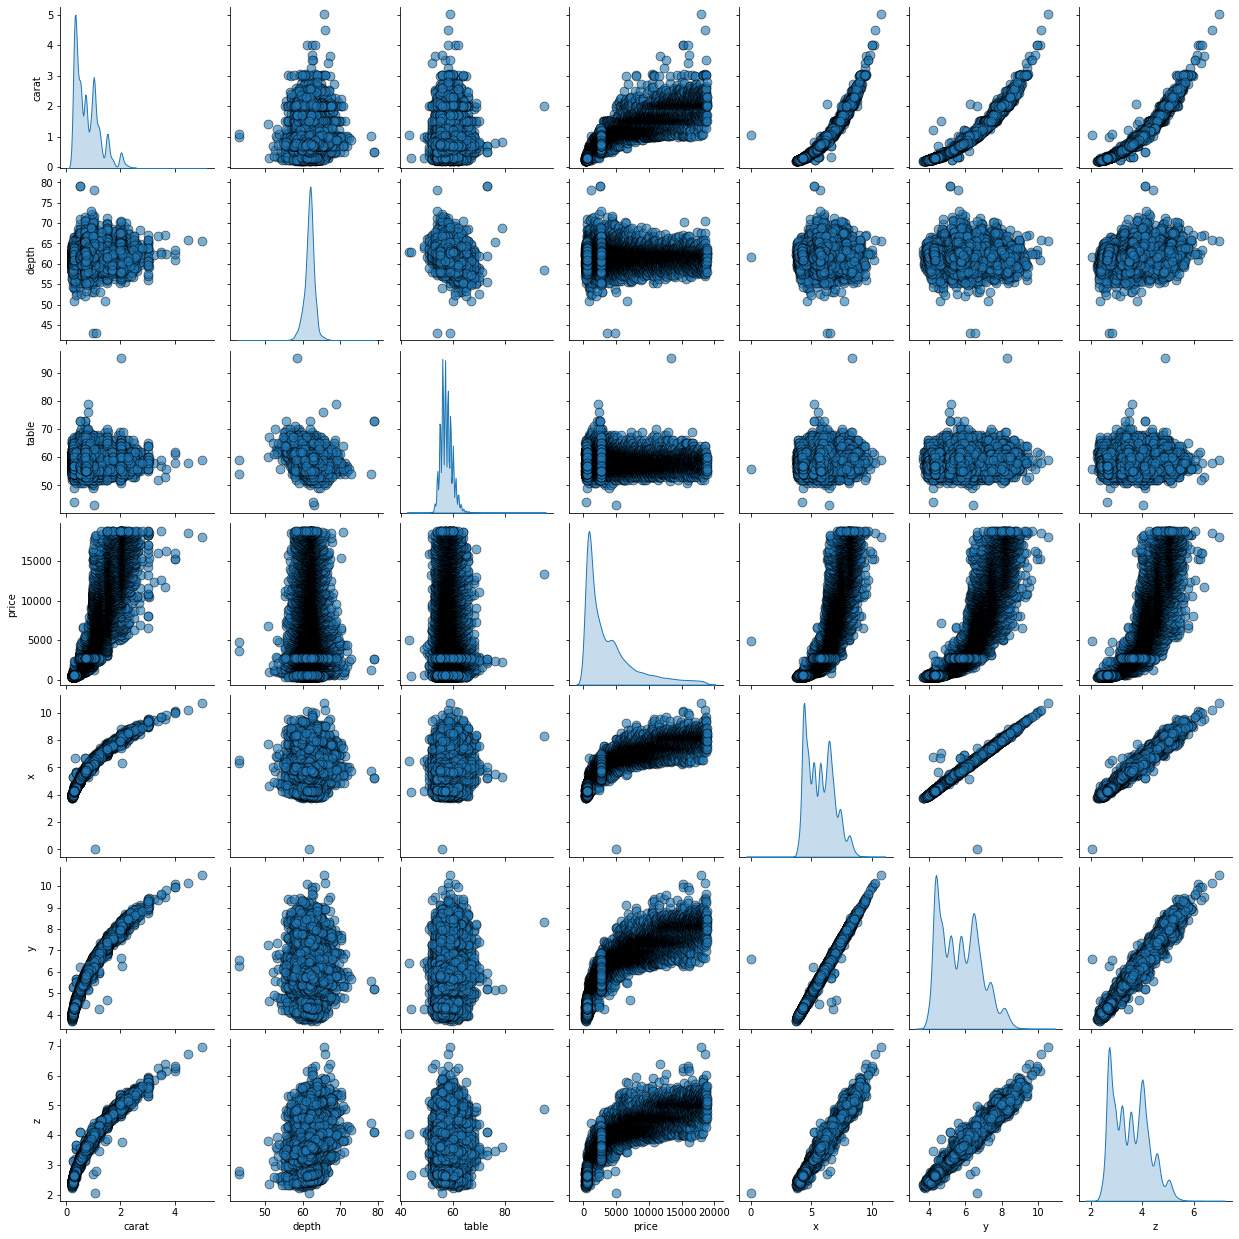

In [39]:
#Run this code
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

**What do you see here? What relationships between variables are the most interesting?**

In [ ]:
#your thoughts here

Now we will see a correlation matrix with a plot. As you know a higher correlation means that the feature could be an effect (**but is not for sure**) for the changes on the price.

We will see this with a matrix with colors. A lighter color means greater correlation. 

This is done with the `seaborn` library as well.

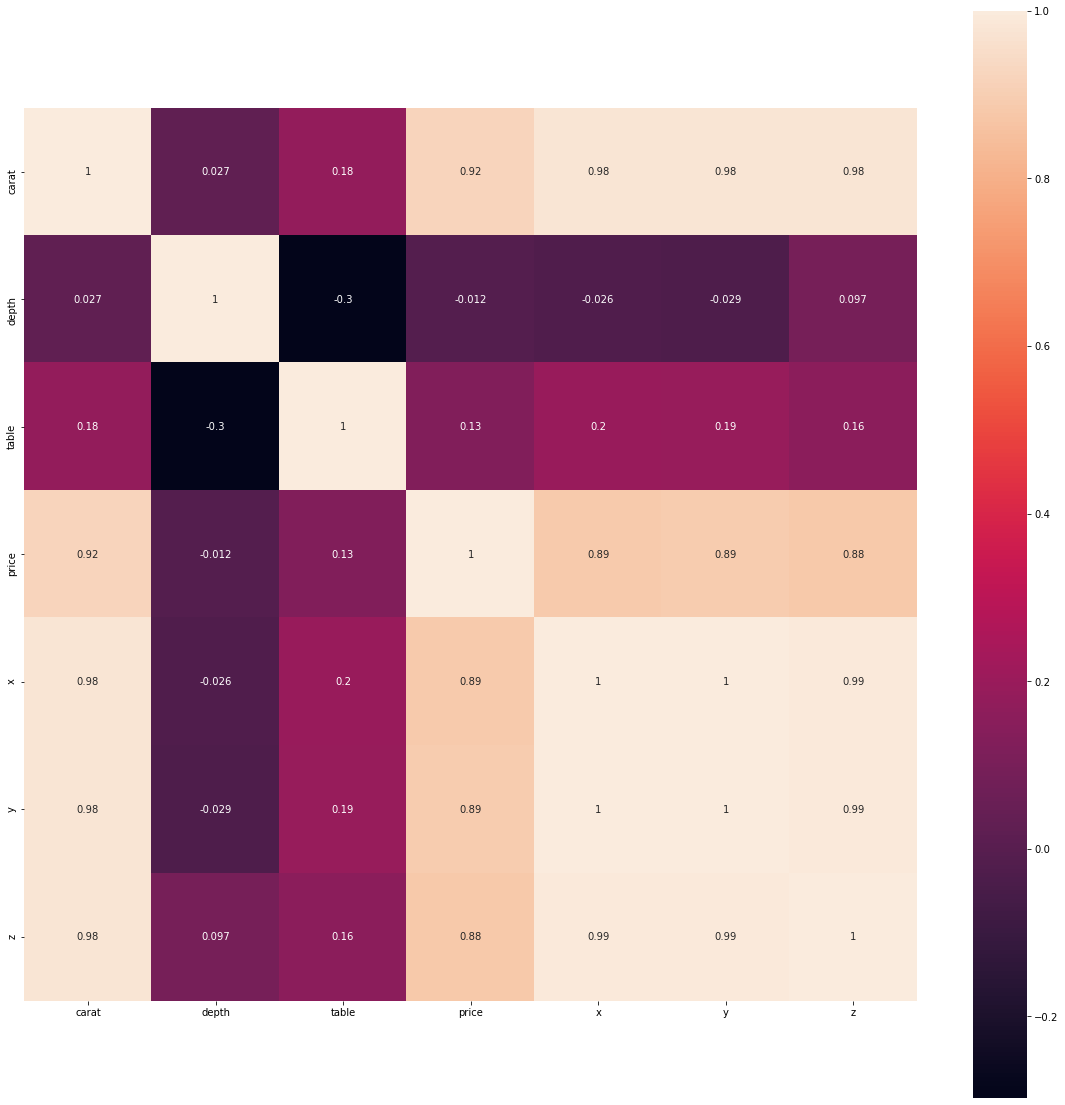

In [40]:
#Run this code
plt.figure(figsize=(20, 20))
p = sns.heatmap(diamonds.corr(), annot=True, square=True)

**What do you see here? Regarding the results before, does it fit with them?**

In [ ]:
#your thoughts here

Finally, we will calculate the linear regression between the price and the weight. This will be done first by plotting it with the `seaborn` library and then calculating the error with the `scipy` library.

In [48]:
#Run this code
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.carat, diamonds.price, scatter=True, hue='depth')


C:\Users\forqu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


TypeError: regplot() got an unexpected keyword argument 'hue'

<Figure size 720x720 with 0 Axes>

<AxesSubplot:xlabel='x', ylabel='price'>

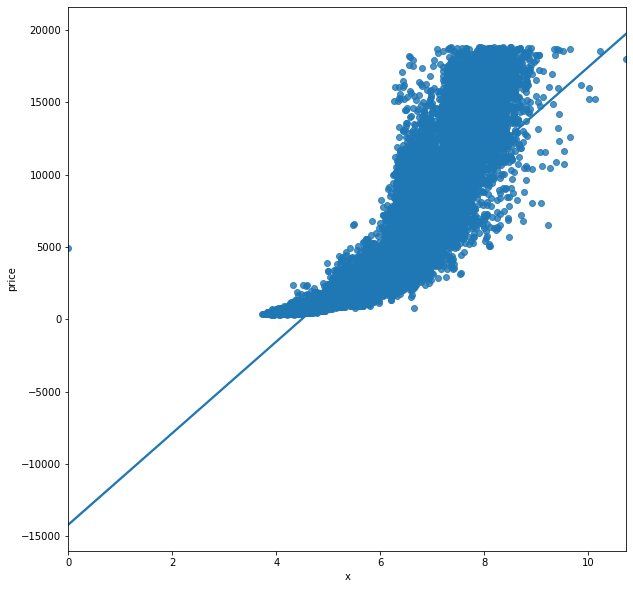

In [44]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.x, diamonds.price, scatter=True)


C:\Users\forqu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='price'>

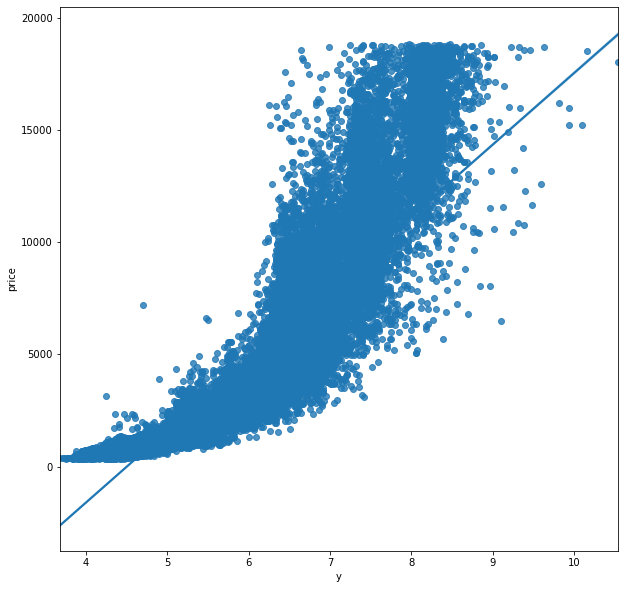

In [46]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.y, diamonds.price, scatter=True)

C:\Users\forqu\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='price'>

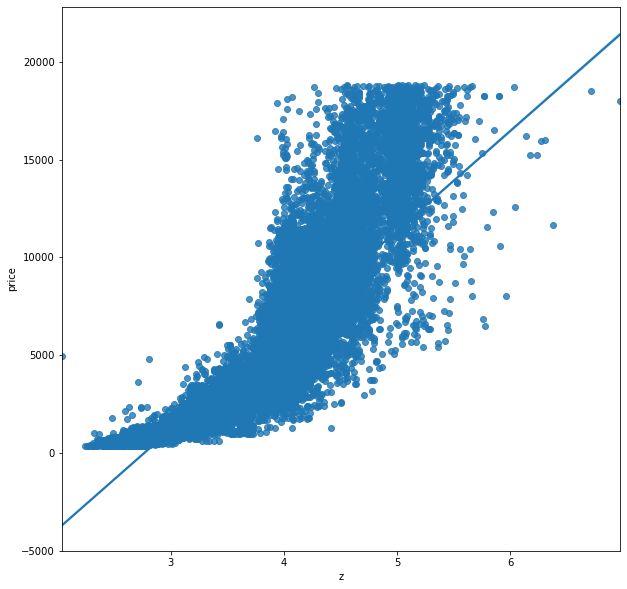

In [47]:
plt.figure(figsize=(10, 10))
sns.regplot(diamonds.z, diamonds.price, scatter=True)

<AxesSubplot:xlabel='carat', ylabel='price'>

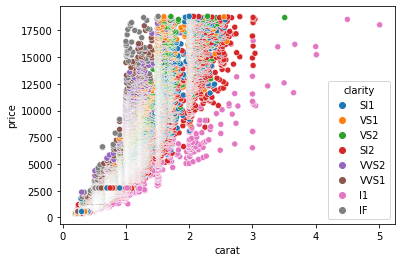

In [95]:
sns.scatterplot(data = diamonds, x = 'carat', y='price', hue='clarity')

<AxesSubplot:xlabel='z', ylabel='price'>

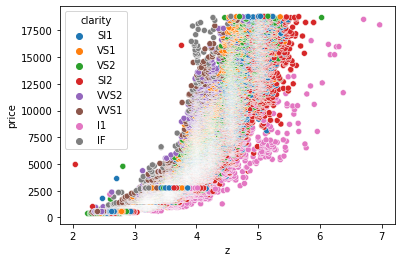

In [96]:
sns.scatterplot(data = diamonds, x = 'z', y='price', hue='clarity')

<AxesSubplot:xlabel='carat', ylabel='price'>

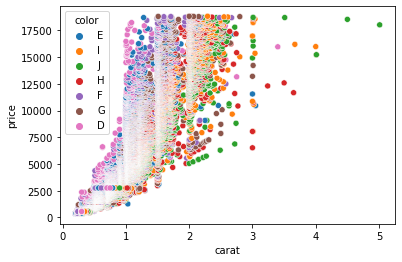

In [99]:
sns.scatterplot(data = diamonds, x = 'carat', y='price', hue='color')

<AxesSubplot:xlabel='depth', ylabel='price'>

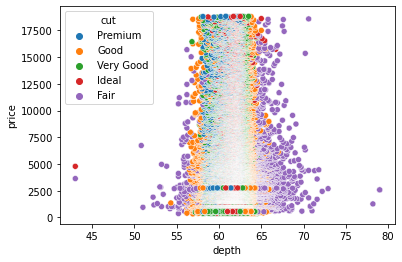

In [94]:
sns.scatterplot(data = diamonds, x = 'depth', y='price', hue='cut')

<AxesSubplot:xlabel='color', ylabel='price'>

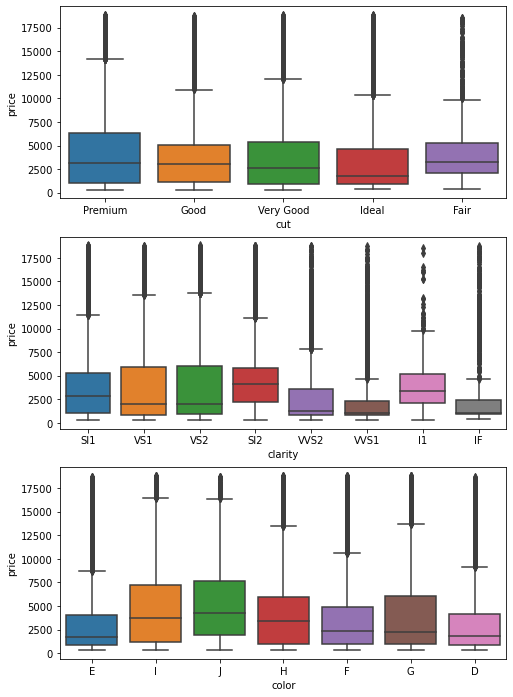

In [107]:
fig, ax = plt.subplots(3,1, figsize = (8,12))
sns.boxplot(data = diamonds, x = 'cut', y = 'price', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'price', ax=ax[1])
sns.boxplot(data = diamonds, x = 'color', y = 'price', ax=ax[2])

<AxesSubplot:xlabel='color', ylabel='carat'>

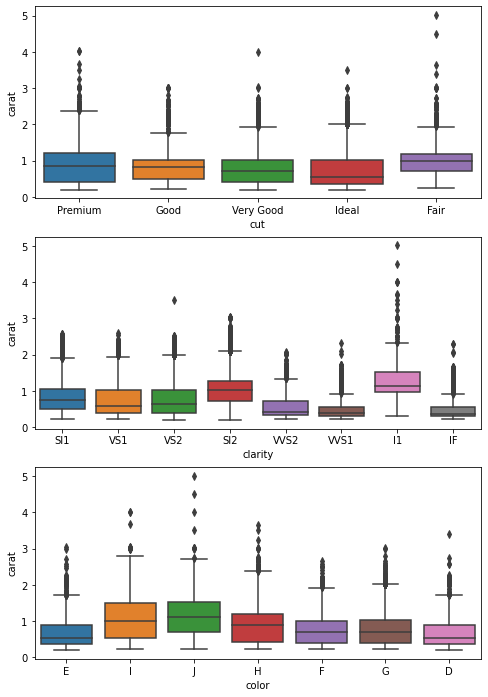

In [108]:
fig, ax = plt.subplots(3,1, figsize = (8,12))
sns.boxplot(data = diamonds, x = 'cut', y = 'carat', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'carat', ax=ax[1])
sns.boxplot(data = diamonds, x = 'color', y = 'carat', ax=ax[2])

<AxesSubplot:xlabel='color', ylabel='depth'>

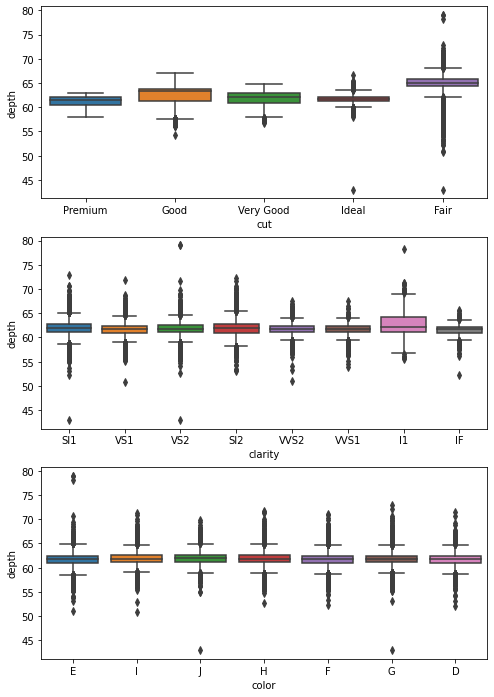

In [109]:
fig, ax = plt.subplots(3,1, figsize = (8,12))
sns.boxplot(data = diamonds, x = 'cut', y = 'depth', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'depth', ax=ax[1])
sns.boxplot(data = diamonds, x = 'color', y = 'depth', ax=ax[2])

<AxesSubplot:xlabel='color', ylabel='table'>

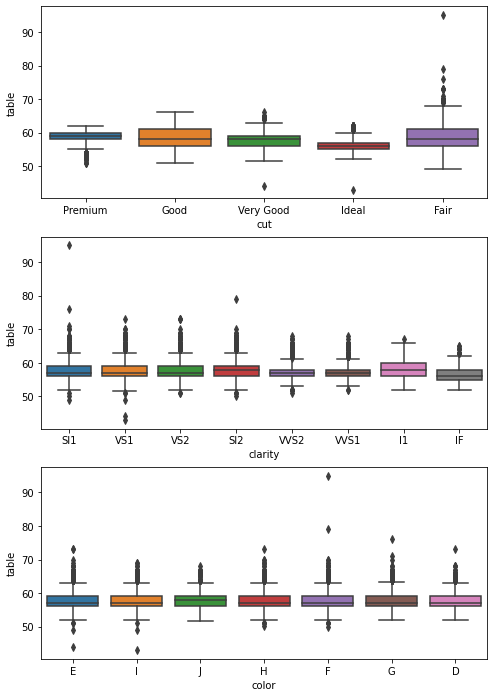

In [111]:
fig, ax = plt.subplots(3,1, figsize = (8,12))
sns.boxplot(data = diamonds, x = 'cut', y = 'table', ax=ax[0])
sns.boxplot(data = diamonds, x = 'clarity', y = 'table', ax=ax[1])
sns.boxplot(data = diamonds, x = 'color', y = 'table', ax=ax[2])

In [42]:
#Run this code
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(diamonds.carat, diamonds.price)
r2 = r_value ** 2
r2

0.8504518164315344

**What do you think?**

In [ ]:
#your thoughts here

**Would you do any other checks on other features? Do you have any comments regarding `carat`?**

In [ ]:
#your thoughts here

**Conlcusion**

**From our dataset** we can conclude that although `color` and `clarity` have a classification, and thus an assigned importance or weight, they do not influence the monetary value of a diamond in determining way. While it is true that different colors or clarities may have different prices, upon closer examination those variations in price seem to be linked to `carat` (weight) and its `dimensions`. In our analysis, the key factor to determining a diamond's value was placed solely in the aforementioned features, since we can see in our correlation coefficients and in the coefficient of determination that these features are closely related.